#   Airbnb Data Analyze Report


###   Business Understanding
-   As we know, Airbnb is the biggest house rent platform on internet. On the official website, we can search and find some house in location and rent it. 


###   Data Understanding
-   At this section, we download the dataset for Seattle and Boston. Explore some data, and translate it into Chinese (because of I'm Chinese). 
-   The dataset of Seattle and Boston, they both have three csv file. The 'calendar.csv' saved some calendar infomation. The 'listings.csv' saved some listing infomation. And the 'reviews.csv' saved some review infomation. Both of the feature which named listing_id in 'calendar.csv' and 'reviews.csv' are related to the feature which named id in 'listings.csv'.
-   In this section, I will download the dataset from my OSS server, and load them into dataframe. And you can find some infomation about the raw data from dataset after all.


####   Prepare and Download DataSet


In [1]:
## initial directorys
!mkdir data/
!mkdir data/boston
!mkdir data/seattle

## download data from oss
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/seattle/calendar.csv -O data/seattle/calendar.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/seattle/listings.csv -O data/seattle/listings.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/seattle/reviews.csv -O data/seattle/reviews.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/boston/calendar.csv -O data/boston/calendar.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/boston/listings.csv -O data/boston/listings.csv
!wget --no-check-certificate -c https://oss.hacking-linux.com/udacity/airbnb/boston/reviews.csv -O data/boston/reviews.csv


--2018-09-12 09:06:48--  https://oss.hacking-linux.com/udacity/airbnb/seattle/calendar.csv
Resolving oss.hacking-linux.com (oss.hacking-linux.com)... 47.75.18.188, 47.75.18.182
Connecting to oss.hacking-linux.com (oss.hacking-linux.com)|47.75.18.188|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 36650955 (35M) [text/csv]
Saving to: 'data/seattle/calendar.csv'

data/seattle/calend 100%[===================>]  34.95M  5.82MB/s    in 7.3s    

2018-09-12 09:06:56 (4.80 MB/s) - 'data/seattle/calendar.csv' saved [36650955/36650955]

--2018-09-12 09:06:56--  https://oss.hacking-linux.com/udacity/airbnb/seattle/listings.csv
Resolving oss.hacking-linux.com (oss.hacking-linux.com)... 47.75.18.188, 47.75.18.182
Connecting to oss.hacking-linux.com (oss.hacking-linux.com)|47.75.18.188|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 16871061 (16M)

####   import pkgs

In [2]:
## import pkgs
import re
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import gender_guesser.detector as gender
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

## magic funcs
%matplotlib inline


####   Declare Global Values


In [3]:
## define base dir
DATA_DIR = './data'
SEATTLE_DIR = '{}/seattle'.format(DATA_DIR)
BOSTON_DIR = '{}/boston'.format(DATA_DIR)

## define data file point
FP_SEATTLE_CLENDAR = '{}/calendar.csv'.format(SEATTLE_DIR)
FP_SEATTLE_LISTINGS = '{}/listings.csv'.format(SEATTLE_DIR)
FP_SEATTLE_REVIEWS = '{}/reviews.csv'.format(SEATTLE_DIR)

FP_BOSTON_CLENDAR = '{}/calendar.csv'.format(BOSTON_DIR)
FP_BOSTON_LISTINGS = '{}/listings.csv'.format(BOSTON_DIR)
FP_BOSTON_REVIEWS = '{}/reviews.csv'.format(BOSTON_DIR)


####   Load Data


In [4]:
## load data from csv
df_seattle_clendar_raw = pd.read_csv(FP_SEATTLE_CLENDAR)
df_seattle_listings_raw = pd.read_csv(FP_SEATTLE_LISTINGS)
df_seattle_reviews_raw = pd.read_csv(FP_SEATTLE_REVIEWS)

df_boston_clendar_raw = pd.read_csv(FP_BOSTON_CLENDAR)
df_boston_listings_raw = pd.read_csv(FP_BOSTON_LISTINGS)
df_boston_reviews_raw = pd.read_csv(FP_BOSTON_REVIEWS)


####   Explore Data


#####   df_seattle_clendar_raw:


-   The table of df_seattle_clendar_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|listing_id|清单id|df_seattle_listings_raw['id']|
|date|日期||
|available|是否可用||
|price|价格||


In [5]:
df_seattle_clendar_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
df_seattle_clendar_raw.head()


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


#####   df_seattle_listings_raw:


-   The table of df_seattle_listings_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|id|id|PK|
|listing_url|清单url||
|scrape_id|||
|last_scraped|||
|name|清单名||
|summary|摘要||
|space|空间||
|description|描述||
|experiences_offered|体验||
|neighborhood_overview|邻居||
|notes|记录||
|transit|中转||
|thumbnail_url|简介url||
|medium_url|视频url||
|picture_url|图片url||
|xl_picture_url|x1图片url||
|host_id|租客id||
|host_url|租客url||
|host_name|租客姓名||
|host_since|租客||
|host_location|租客地址||
|host_about|租客信息||
|host_response_time|租客响应时间||
|host_response_rate|租客响应率||
|host_acceptance_rate|租客验收率||
|host_is_superhost|租客是会员||
|host_thumbnail_url|租客简介url||
|host_picture_url|租客图片url||
|host_neighbourhood|租客邻居||
|host_listings_count|租客清单数||
|host_total_listings_count|租客清单总数||
|host_verifications|租客验证信息||
|host_has_profile_pic|租客是否有头像||
|host_identity_verified|租客账户是否验证||
|street|街道||
|neighbourhood|邻居||
|neighbourhood_cleansed|||
|neighbourhood_group_cleansed|||
|city|城市||
|state|街道||
|zipcode|邮编||
|market|市场||
|smart_location|智能定位||
|country_code|国家代码||
|country|国家||
|latitude|纬度||
|longitude|经度||
|is_location_exact|位置是否准确||
|property_type|房屋种类||
|room_type|房型||
|accommodates|容纳空间||
|bathrooms|浴室||
|bedrooms|卧室||
|beds|床||
|bed_type|床类型||
|amenities|设施||
|square_feet|平方||
|price|价格||
|weekly_price|价格(周)||
|monthly_price|价格(月)||
|security_deposit|保证金||
|cleaning_fee|清洁费||
|guests_included|客人数||
|extra_people|额外的人||
|minimum_nights|最少的夜晚||
|maximum_nights|最多的夜晚||
|calendar_updated|日历已更新||
|has_availability|有空房||
|availability_30|可租(30天)||
|availability_60|可租(60天)||
|availability_90|可租(90天)||
|availability_365|可租(365天)||
|calendar_last_scraped|||
|number_of_reviews|评论数||
|first_review|第一条评论||
|last_review|最后一条评论||
|review_scores_rating|评论分数||
|review_scores_accuracy|评论分数(准确度)||
|review_scores_cleanliness|评论分数(清洁度)||
|review_scores_checkin|评论分数(入住)||
|review_scores_communication|评论分数(交流)||
|review_scores_location|评论分数(位置)||
|review_scores_value|评论分数(价值)||
|requires_license|需要许可证||
|license|许可证||
|jurisdiction_names|辖区名称||
|instant_bookable|即时预订||
|cancellation_policy|取消政策||
|require_guest_profile_picture|需要租客头像||
|require_guest_phone_verification|需要租客手机通过验证||
|calculated_host_listings_count|计算租客清单数量||
|reviews_per_month|每个月的评论||


In [7]:
df_seattle_listings_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [8]:
df_seattle_listings_raw.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#####   df_seattle_reviews_raw:


-   The table of df_seattle_reviews_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|listing_id|清单列表|df_seattle_listings_raw['id']|
|id|id|PK|
|date|日期||
|reviewer_id|评论id||
|reviewer_name|评论名||
|comments|备注||


In [9]:
df_seattle_reviews_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [10]:
df_seattle_reviews_raw.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#####   df_boston_clendar_raw:


-   The table of df_boston_clendar_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|listing_id|清单id|df_boston_listings_raw['id']|
|date|日期||
|available|有效性||
|price|价格||


In [11]:
df_boston_clendar_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [12]:
df_boston_clendar_raw.head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


#####   df_boston_listings_raw:


-   The table of df_boston_listings_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|id|id|PK|
|listing_url|清单url||
|scrape_id|||
|last_scraped|||
|name|清单名||
|summary|摘要||
|space|空间||
|description|描述||
|experiences_offered|体验||
|neighborhood_overview|邻居||
|notes|记录||
|transit|中转	||
|access|访问||
|interaction|影响||
|house_rules|房屋规则||
|thumbnail_url|简介url||
|medium_url|媒体url||
|picture_url|图片url||
|xl_picture_url|x1图片url||
|host_id|租客id||
|host_url|租客url||
|host_name|租客姓名||
|host_since|租客预定时间||
|host_location|租客地址||
|host_about|租客信息||
|host_response_time|租客响应时间||
|host_response_rate|租客响应率||
|host_acceptance_rate|租客验收率||
|host_is_superhost|租客是会员||
|host_thumbnail_url|租客简介url||
|host_picture_url|租客图片url||
|host_neighbourhood|租客邻居||
|host_listings_count|租客清单数||
|host_total_listings_count|租客清单总数||
|host_verifications|租客验证信息||
|host_has_profile_pic|租客是否有头像||
|host_identity_verified|租客账户是否验证||
|street|街道||
|neighbourhood|邻居||
|neighbourhood_cleansed|||
|neighbourhood_group_cleansed|||
|city|城市||
|state|街道||
|zipcode|邮编||
|market|市场||
|smart_location|智能定位||
|country_code|国家代码||
|country|国家||
|latitude|纬度||
|longitude|经度||
|is_location_exact|位置是否准确||
|property_type|房屋种类||
|room_type|房型||
|accommodates|容纳空间||
|bathrooms|浴室||
|bedrooms|卧室||
|beds|床||
|bed_type|床类型||
|amenities|设施||
|square_feet|平方||
|price|价格||
|weekly_price|价格(周)||
|monthly_price|价格(月)||
|security_deposit|保证金||
|cleaning_fee|清洁费||
|guests_included|客人数||
|extra_people|额外的人||
|minimum_nights|最少的夜晚||
|maximum_nights|最多的夜晚||
|calendar_updated|日历已更新||
|has_availability|有空房||
|availability_30|可租(30天)||
|availability_60|可租(60天)||
|availability_90|可租(90天)||
|availability_365|可租(365天)||
|calendar_last_scraped|||
|number_of_reviews|评论数||
|first_review|第一条评论||
|last_review|最后一条评论||
|review_scores_rating|评论分数||
|review_scores_accuracy|评论分数(准确度)||
|review_scores_cleanliness|评论分数(清洁度)||
|review_scores_checkin|评论分数(入住)||
|review_scores_communication|评论分数(交流)||
|review_scores_location|评论分数(位置)||
|review_scores_value|评论分数(价值)||
|requires_license|需要许可证||
|license|许可证||
|jurisdiction_names|辖区名称||
|instant_bookable|即时预订||
|cancellation_policy|取消政策||
|require_guest_profile_picture|需要租客头像||
|require_guest_phone_verification|需要租客手机通过验证||
|calculated_host_listings_count|计算租客清单数量||
|reviews_per_month|每个月的评论||


In [13]:
df_boston_listings_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [14]:
df_boston_listings_raw.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


#####   df_boston_reviews_raw:


-   The table of df_boston_eviews_raw's meaning:

|Feature|Meaning|Relation|
|:-:|:-:|:-:|
|listing_id|清单id|df_boston_listings_raw['id']|
|id|id|PK|
|date|日期||
|reviewer_id|评论id||
|reviewer_name|评论名||
|comments|备注||


In [15]:
df_boston_reviews_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [16]:
df_boston_reviews_raw.head()


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


###   Prepare Data
-   In this section, I will do some action with NaN values. Above all, you can find I do some deepcopy from raw data, because of I don't want to change the raw data here. At first I will check all the features have NaN values. And have a look of the NaN values of the features. If there's necessary to drop the columns of data, then drop it. If there's all of NaN values of one feature, then drop it. And some features needed One-Hot transform for it.
-   You can find all the process of this section under this cell.


####   Check NaN Values


In [17]:
## deepcopy df
df_seattle_clendar = deepcopy(df_seattle_clendar_raw)
df_seattle_listings = deepcopy(df_seattle_listings_raw)
df_seattle_reviews = deepcopy(df_seattle_reviews_raw)

df_boston_clendar = deepcopy(df_boston_clendar_raw)
df_boston_listings = deepcopy(df_boston_listings_raw)
df_boston_reviews = deepcopy(df_boston_reviews_raw)


#####   df_seattle_clendar_raw:


In [18]:
df_seattle_clendar.count()


listing_id    1393570
date          1393570
available     1393570
price          934542
dtype: int64

In [19]:
## listing_id, date, available, price
df_seattle_clendar.isnull().sum()


listing_id         0
date               0
available          0
price         459028
dtype: int64

In [20]:
## get all the NaN values in price
df_seattle_clendar[df_seattle_clendar_raw['price'].isnull()].head()


,listing_id,date,available,price
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN


-   After explore the NaN values of df_seattle_clendar, it only have some NaN price values with not available lines. That's ok, don't drop it.


#####   df_seattle_listings_raw:


In [21]:
## explore data
df_seattle_listings.isnull().sum()


id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [22]:
## get features have NaN values
nan_list = []
for feature in df_seattle_listings.columns:
    if df_seattle_listings[feature].isnull().sum() > 0:
        nan_list.append(feature)
        print('{}|{}'.format(feature, df_seattle_listings[feature].isnull().sum()))


summary|177
space|569
neighborhood_overview|1032
notes|1606
transit|934
thumbnail_url|320
medium_url|320
xl_picture_url|320
host_name|2
host_since|2
host_location|8
host_about|859
host_response_time|523
host_response_rate|523
host_acceptance_rate|773
host_is_superhost|2
host_thumbnail_url|2
host_picture_url|2
host_neighbourhood|300
host_listings_count|2
host_total_listings_count|2
host_has_profile_pic|2
host_identity_verified|2
neighbourhood|416
zipcode|7
property_type|1
bathrooms|16
bedrooms|6
beds|1
square_feet|3721
weekly_price|1809
monthly_price|2301
security_deposit|1952
cleaning_fee|1030
first_review|627
last_review|627
review_scores_rating|647
review_scores_accuracy|658
review_scores_cleanliness|653
review_scores_checkin|658
review_scores_communication|651
review_scores_location|655
review_scores_value|656
license|3818
reviews_per_month|627


In [23]:
## features have NaN values:
## 'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 
## 'medium_url', 'xl_picture_url', 'host_name', 'host_since', 'host_location', 'host_about', 
## 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
## 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 
## 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 
## 'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price', 
## 'monthly_price', 'security_deposit', 'cleaning_fee', 'first_review', 'last_review', 
## 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
## 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month'

## summary allowed NaN values, so don't drop it
## df_seattle_listings['summary']

## space allowed NaN values, so don't drop it
## df_seattle_listings['space']

## neighborhood_overview allowed NaN values, so don't drop it
## df_seattle_listings['neighborhood_overview']

## notes allowed NaN values, so don't drop it
## df_seattle_listings['notes']

## transit allowed NaN values, so don't drop it
## df_seattle_listings['transit']

## thumbnail_url allowed NaN values, so don't drop it
## df_seattle_listings['thumbnail_url']

## medium_url allowed NaN values, so don't drop it
## df_seattle_listings['medium_url']

## xl_picture_url allowed NaN values, so don't drop it
## df_seattle_listings['xl_picture_url']

## host_name NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['host_name'].isnull()].index,
                             inplace = True)

## host_since's NaN was dropped yet
## df_seattle_listings[df_seattle_listings['host_since'].isnull()]

## host_location NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['host_location'].isnull()].index,
                             inplace = True)

## host_about allowed allowed NaN values, so don't drop it
## df_seattle_listings['host_about']

## host_response_time allowed NaN values, so don't drop it
## df_seattle_listings['host_response_time']

## host_response_rate allowed NaN values, so don't drop it
## df_seattle_listings['host_response_rate']

## host_acceptance_rate allowed NaN values, so don't drop it
## df_seattle_listings['host_acceptance_rate']

## host_is_superhost's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_is_superhost'].isnull()]

## host_thumbnail_url's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_thumbnail_url'].isnull()]

## host_picture_url's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_picture_url'].isnull()]

## trans host_is_superhost to [0, 1], and set NaN to 0
df_seattle_listings['host_is_superhost'].replace(['f', 't', np.NaN], [0, 1, 0], inplace = True)

## host_listings_count's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_listings_count'].isnull()]

## host_total_listings_count's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_total_listings_count'].isnull()]

## host_has_profile_pic's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_has_profile_pic'].isnull()]

## host_identity_verified's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['host_identity_verified'].isnull()]

## host_identity_verified's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['neighbourhood'].isnull()]

## zipcode's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['zipcode'].isnull()]

## property_type NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['property_type'].isnull()].index,
                             inplace = True)

## trans bathrooms NaN to 0
df_seattle_listings['bathrooms'].replace([np.NaN], [0], inplace = True)

## trans bedrooms NaN to 0
df_seattle_listings['bedrooms'].replace([np.NaN], [0], inplace = True)

## beds NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['beds'].isnull()].index,
                             inplace = True)

## square_feet feature have a lot of NaN values, at last think about drop this feature
df_seattle_listings.drop(['square_feet'], axis = 1, inplace = True)

## weekly_price's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['weekly_price'].isnull()]

## monthly_price's allowed NaN values, so don't drop it
## df_seattle_listings[df_seattle_listings['monthly_price'].isnull()]

## trans security_deposit NaN to 0
df_seattle_listings['security_deposit'].replace([np.NaN], [0], inplace = True)

## trans cleaning_fee NaN to 0
df_seattle_listings['cleaning_fee'].replace([np.NaN], [0], inplace = True)

## first_review NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['first_review'].isnull()].index,
                             inplace = True)

## last_review's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['last_review'].isnull()].index,
                             inplace = True)

## review_scores_rating's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_rating'].isnull()].index,
                             inplace = True)

## review_scores_accuracy's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_accuracy'].isnull()].index,
                             inplace = True)

## review_scores_cleanliness's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_cleanliness'].isnull()].index,
                             inplace = True)

## review_scores_checkin's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_checkin'].isnull()].index,
                             inplace = True)

## review_scores_communication's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_communication'].isnull()].index,
                             inplace = True)

## review_scores_location's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_location'].isnull()].index,
                             inplace = True)

## review_scores_value's NaN values' drop
df_seattle_listings.drop(df_seattle_listings[df_seattle_listings['review_scores_value'].isnull()].index,
                             inplace = True)

## license feature have a lot of NaN values, at last think about drop this feature
df_seattle_listings.drop(['license'], axis = 1, inplace = True)

## reviews_per_month is ok now, nothing to drop
## df_seattle_listings[df_seattle_listings['reviews_per_month'].isnull()]


#####   df_seattle_reviews:


In [24]:
## df_seattle_reviews is ok, nothing to drop
df_seattle_reviews.isnull().sum()


listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

#####   df_boston_clendar:


In [25]:
df_boston_clendar.count()


listing_id    1308890
date          1308890
available     1308890
price          643037
dtype: int64

In [26]:
df_boston_clendar[df_boston_clendar['price'].isnull()].head()


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


-   After explore the NaN values of df_boston_clendar, it only have some NaN price values with not available lines. That's ok, don't drop it.


#####   df_boston_listings:


In [27]:
## explore data
df_boston_listings.isnull().sum()


id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         11
host_about      

In [28]:
## get features have NaN values
nan_list = []
for feature in df_boston_listings.columns:
    if df_boston_listings[feature].isnull().sum() > 0:
        nan_list.append(feature)
        print('{}|{}'.format(feature, df_boston_listings[feature].isnull().sum()))
        

summary|143
space|1057
neighborhood_overview|1415
notes|1975
transit|1290
access|1489
interaction|1554
house_rules|1192
thumbnail_url|599
medium_url|599
xl_picture_url|599
host_location|11
host_about|1309
host_response_time|471
host_response_rate|471
host_acceptance_rate|471
host_neighbourhood|339
neighbourhood|543
neighbourhood_group_cleansed|3585
city|2
zipcode|38
market|14
property_type|3
bathrooms|14
bedrooms|10
beds|9
square_feet|3529
weekly_price|2693
monthly_price|2697
security_deposit|2243
cleaning_fee|1107
has_availability|3585
first_review|756
last_review|756
review_scores_rating|813
review_scores_accuracy|823
review_scores_cleanliness|818
review_scores_checkin|820
review_scores_communication|818
review_scores_location|822
review_scores_value|821
license|3585
jurisdiction_names|3585
reviews_per_month|756


In [29]:
## features have NaN values
## 'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 
## 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 
## 'xl_picture_url', 'host_location', 'host_about', 'host_response_time', 
## 'host_response_rate', 'host_acceptance_rate', 'host_neighbourhood', 
## 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'zipcode', 'market', 
## 'property_type', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'weekly_price', 
## 'monthly_price', 'security_deposit', 'cleaning_fee', 'has_availability', 'first_review', 
## 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
## 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
## 'license', 'jurisdiction_names', 'reviews_per_month'

## summary's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['summary'].isnull()]

## space's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['space'].isnull()]

## neighborhood_overview's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['neighborhood_overview'].isnull()]

## notes's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['notes'].isnull()]

## transit's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['transit'].isnull()]

## access's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['access'].isnull()]

## interaction's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['interaction'].isnull()]

## house_rules's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['house_rules'].isnull()]

## thumbnail_url's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['thumbnail_url'].isnull()]

## medium_url's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['medium_url'].isnull()]

## xl_picture_url's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['xl_picture_url'].isnull()]

## host_location NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['host_location'].isnull()].index,
                             inplace = True)

## host_about's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_about'].isnull()]

## host_response_time's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_response_time'].isnull()]

## host_response_rate's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_response_rate'].isnull()]

## host_acceptance_rate's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_acceptance_rate'].isnull()]

## host_acceptance_rate's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_acceptance_rate'].isnull()]

## host_neighbourhood's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['host_neighbourhood'].isnull()]

## neighbourhood is the same as host_neighbourhood, so drop it
df_boston_listings.drop(['neighbourhood'], axis = 1, inplace = True)

## neighbourhood is the same as host_neighbourhood, so drop it
df_boston_listings.drop(['neighbourhood_group_cleansed'], axis = 1, inplace = True)

## neighbourhood_group_cleansed's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['neighbourhood_group_cleansed'].isnull()]

## city NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['city'].isnull()].index,
                             inplace = True)

## zipcode NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['zipcode'].isnull()].index,
                             inplace = True)

## market NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['market'].isnull()].index,
                             inplace = True)

## market NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['market'].isnull()].index,
                             inplace = True)

## property_type NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['property_type'].isnull()].index,
                             inplace = True)

## trans bathrooms NaN to 0
df_boston_listings['bathrooms'].replace([np.NaN], [0], inplace = True)

## trans bedrooms NaN to 0
df_boston_listings['bedrooms'].replace([np.NaN], [0], inplace = True)

## beds NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['beds'].isnull()].index,
                             inplace = True)

## square_feet feature have a lot of NaN values, at last think about drop this feature
df_boston_listings.drop(['square_feet'], axis = 1, inplace = True)

## weekly_price's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['weekly_price'].isnull()]

## monthly_price's allowed NaN values, so don't drop it
## df_boston_listings[df_boston_listings['monthly_price'].isnull()]

## trans security_deposit NaN to 0
df_boston_listings['security_deposit'].replace([np.NaN], [0], inplace = True)

## trans cleaning_fee NaN to 0
df_boston_listings['cleaning_fee'].replace([np.NaN], [0], inplace = True)

## has_availability feature have a lot of NaN values, at last think about drop this feature
df_boston_listings.drop(['has_availability'], axis = 1, inplace = True)

## first_review NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['first_review'].isnull()].index,
                             inplace = True)

## last_review's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['last_review'].isnull()].index,
                             inplace = True)

## review_scores_rating's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_rating'].isnull()].index,
                             inplace = True)

## review_scores_accuracy's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_accuracy'].isnull()].index,
                             inplace = True)

## review_scores_cleanliness's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_cleanliness'].isnull()].index,
                             inplace = True)

## review_scores_checkin's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_checkin'].isnull()].index,
                             inplace = True)

## review_scores_communication's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_communication'].isnull()].index,
                             inplace = True)

## review_scores_location's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_location'].isnull()].index,
                             inplace = True)

## review_scores_value's NaN values' drop
df_boston_listings.drop(df_boston_listings[df_boston_listings['review_scores_value'].isnull()].index,
                             inplace = True)

## license feature have a lot of NaN values, at last think about drop this feature
df_boston_listings.drop(['license'], axis = 1, inplace = True)

## jurisdiction_names feature have a lot of NaN values, at last think about drop this feature
df_boston_listings.drop(['jurisdiction_names'], axis = 1, inplace = True)

## reviews_per_month is ok now, nothing to drop
## df_seattle_listings[df_seattle_listings['reviews_per_month'].isnull()]


#####   df_boston_reviews:


In [30]:
## explore data
df_boston_reviews.isnull().sum()


listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         53
dtype: int64

###   Data Modeling (Q1)
-   In this section, I will select some features from dataset, plot it and find some pattern for them. Above all, I choose the feature list as 'id', 'city', 'price', 'security_deposit', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'. And have a look of the data, will find the feature of price and security_deposit needed some transform, because of the format of '$', '.', '.' was not allow to change type to int.
-   After transform data, I plot the scatter of price and review_scores_rating, and want to find the pattern of the data.
-   You can find the code of this section and plot after this cell.


####   Question 1: Is there any pattern between price and review_scores_rating ?


In [31]:
## merge df_seattle_listings with df_seattle_reviews
feature_list = ['id', 'city', 'price', 'security_deposit', 'review_scores_rating', 
                'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                'review_scores_communication', 'review_scores_location', 'review_scores_value']
df_seattle = df_seattle_listings[feature_list]
df_boston = df_boston_listings[feature_list]

## show some data
df_seattle.head()


,id,city,price,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,241032,Seattle,$85.00,0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,Seattle,$150.00,$100.00,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,Seattle,$975.00,"$1,000.00",97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,278830,Seattle,$450.00,$700.00,92.0,9.0,9.0,10.0,10.0,9.0,9.0
5,5956968,Seattle,$120.00,0,95.0,10.0,10.0,10.0,10.0,10.0,10.0


In [32]:
## show some data
df_boston.head()


,id,city,price,security_deposit,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1,3075044,Boston,$65.00,$95.00,94.0,10.0,9.0,10.0,10.0,9.0,9.0
2,6976,Boston,$65.00,0,98.0,10.0,9.0,10.0,10.0,9.0,10.0
4,7651065,Boston,$79.00,0,99.0,10.0,10.0,10.0,10.0,9.0,10.0
5,12386020,Boston,$75.00,0,100.0,10.0,10.0,10.0,10.0,9.0,10.0
6,5706985,Boston,$100.00,0,90.0,10.0,10.0,10.0,10.0,9.0,9.0


In [33]:
## trans the price to int
def trans_price(df_input):
    '''
        This function will return the dataframe without '$', '.', ','
    '''
    df_input['price'] = df_input['price'].replace(r'\$', '', regex = True).replace(r'\.00', '', regex = True).replace(r',', '', regex = True)
    df_input['security_deposit'] = df_input['security_deposit'].replace(r'\$', '', regex = True).replace(r'\.00', '', regex = True).replace(r',', '', regex = True)
    df_input['price'] = df_input['price'].astype('int')
    df_input['security_deposit'] = df_input['security_deposit'].astype('int')
    return(df_input)

## seattle
df_seattle = trans_price(df_seattle)

## boston
df_boston = trans_price(df_boston)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [34]:
## check data type
df_seattle.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158 entries, 0 to 3814
Data columns (total 11 columns):
id                             3158 non-null int64
city                           3158 non-null object
price                          3158 non-null int64
security_deposit               3158 non-null int64
review_scores_rating           3158 non-null float64
review_scores_accuracy         3158 non-null float64
review_scores_cleanliness      3158 non-null float64
review_scores_checkin          3158 non-null float64
review_scores_communication    3158 non-null float64
review_scores_location         3158 non-null float64
review_scores_value            3158 non-null float64
dtypes: float64(7), int64(3), object(1)
memory usage: 296.1+ KB


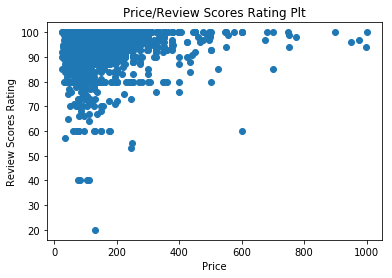

In [35]:
## plot it
plt.scatter(df_seattle['price'], df_seattle['review_scores_rating'])
plt.xlabel('Price')
plt.ylabel('Review Scores Rating')
plt.title('Price/Review Scores Rating Plt')
plt.show()


### Evaluate the Results of Q1:
-   After plot the data scatter between Price and Reviwe Scores Rating, it shows us something. It just like the house which price is higher and it's review scores rating's distribute is almost get higher at the same time. And you will find the price lower than $400's house, the proprobe of the score between 90 and 70 is very high. So, don't try to save any money, more expensive is more worth it.


###   Data Modeling (Q2)
-   At this section, I try to find any pattern between price and other scores. I removed id, and city from the dataframe. I write a loop to plot the scatter between the price and any other score features.
-   You can find all the code and plot after this cell.


####   Question 2: Is there any pattern between any other scores' with price ?


In [36]:
## remove some not required features
feature_plt = feature_list
feature_plt.remove('id')
feature_plt.remove('city')
feature_plt


['price',
 'security_deposit',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

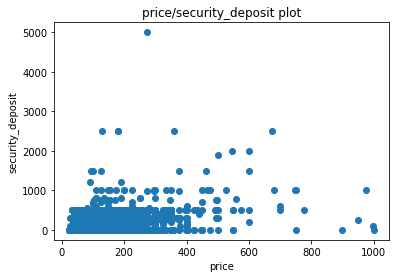

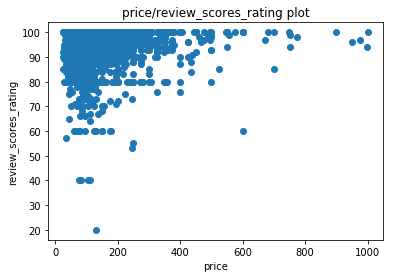

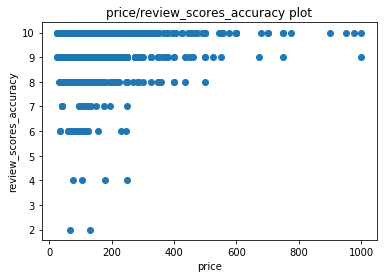

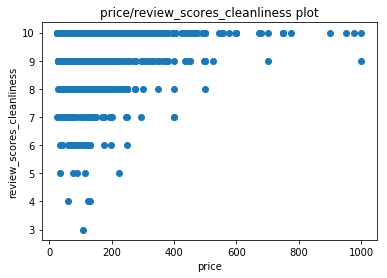

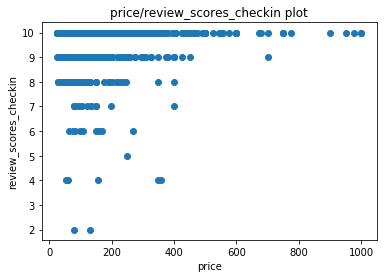

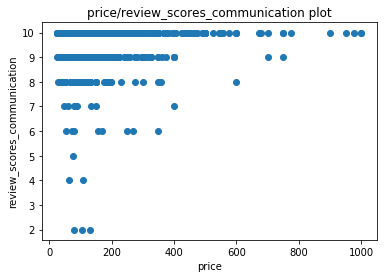

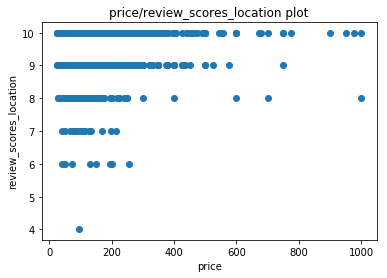

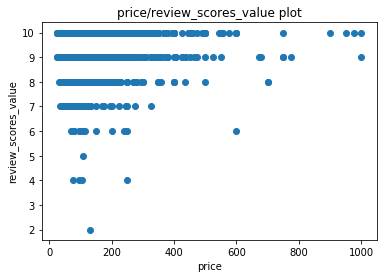

In [37]:
## plot them
maxv = len(feature_plt)
for f1 in range(maxv):
    for f2 in range(f1 + 1, maxv):
        plt.scatter(df_seattle[feature_plt[f1]], df_seattle[feature_plt[f2]])
        plt.xlabel(feature_plt[f1])
        plt.ylabel(feature_plt[f2])
        plt.title('{}/{} plot'.format(feature_plt[f1], feature_plt[f2]))
        plt.show()
        
    break
        

###   Evaluate the Results of Q2:
-   After plot all the features between the price and scores. It seemed like there's only price/security_deposit plot have any affect with others, except the price/review_scores_rating plot we analysed before. From the plot of price/security_deposit, it seemed like the security_deposit is not any relation with price. Maybe the expensive price house was not care about any the security_deposit, and they may faced to any high level consumers.


###   Data Modeling (Q3):
-   At this section, I try to find some pattern about the location and the price.
-   You can find the code and plot after this cell.


####   Questiong 3: Is there any pattern about the location and the price ?


In [38]:
## at this time use the 'country', 'price' features
feature_plt = ['city', 'price']
feature_plt


['city', 'price']

In [39]:
## get the same df for seattle and boston
df_seattle = df_seattle[['city', 'price']]
df_boston = df_boston[['city', 'price']]


In [40]:
## trans some data
df_seattle['city'].replace(['Ballard, Seattle', 'Seattle ', '西雅图'], 
                           ['Ballard Seattle', 'Seattle', 'Seattle'], inplace = True)
set(df_seattle['city'])


{'Ballard Seattle', 'Phinney Ridge Seattle', 'Seattle', 'West Seattle'}

In [41]:
## trans some data
df_boston['city'].replace(['ALLSTON', 'Boston ', 'Boston (Charlestown)', 'Boston (Jamaica Plain)', 
                          'Brighton ', 'Jamaica Plain ', 'Jamaica Plain (Boston)', 'Jamaica Plain, Boston', 
                          'Jamaica Plain, MA', 'Mission Hill, Boston', 'ROXBURY CROSSING', 'Roslindale, Boston', 
                          'boston', 'dorchester, boston ', 'east Boston '], 
                           ['Allston', 'Boston', 'Charlestown', 'Jamaica Plain',
                           'Brighton', 'Jamaica Plain', 'Jamaica Plain', 'Jamaica Plain', 
                           'Jamaica Plain', 'Mission Hill', 'Roxbury Crossing', 'Roslindale', 
                           'Boston', 'Dorchester', 'East Boston'], inplace = True)
set(df_boston['city'])


{'Allston',
 'Boston',
 'Brighton',
 'Brookline',
 'Cambridge',
 'Charlestown',
 'Dorchester',
 'East Boston',
 'Hyde Park',
 'Jamaica Plain',
 'Mattapan',
 'Milton',
 'Mission Hill',
 'Roslindale',
 'Roxbury Crossing',
 'Somerville',
 'South Boston',
 'South End, Boston',
 'West Roxbury'}

In [42]:
## genernate a onehot dict
city_dict = {}
val = 0
for city in set(list(df_seattle.city.values)):
    city_dict[city] = val
    val += 1
    
for city in set(list(df_boston.city.values)):
    city_dict[city] = val
    val += 1

city_dict


{'Allston': 6,
 'Ballard Seattle': 3,
 'Boston': 21,
 'Brighton': 14,
 'Brookline': 7,
 'Cambridge': 15,
 'Charlestown': 19,
 'Dorchester': 17,
 'East Boston': 12,
 'Hyde Park': 4,
 'Jamaica Plain': 9,
 'Mattapan': 18,
 'Milton': 11,
 'Mission Hill': 13,
 'Phinney Ridge Seattle': 2,
 'Roslindale': 5,
 'Roxbury Crossing': 22,
 'Seattle': 0,
 'Somerville': 10,
 'South Boston': 20,
 'South End, Boston': 8,
 'West Roxbury': 16,
 'West Seattle': 1}

In [43]:
## do onehot on city feature
df_data = pd.concat([df_seattle, df_boston])
df_data.replace(city_dict, inplace = True)

df_data.head()


,city,price
0,0,85
1,0,150
2,0,975
4,0,450
5,0,120


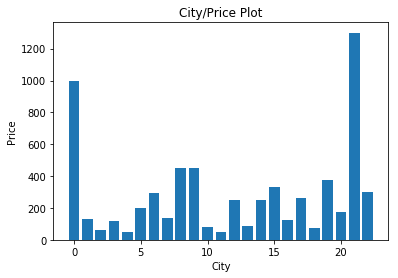

In [44]:
## plot the bar
plt.bar(df_data['city'], df_data['price'])
plt.xlabel('City')
plt.ylabel('Price')
plt.title('City/Price Plot')
plt.show()


###   Evaluate the Results of Q3: 
-   At this question, it seemed like there's many expensive house in class 3 and 20. They are Seattle, and Boston's city center. They're always convenice to shopping and traffic. So it worth this price.


###   Some Interest Points:
-   After all above, can find the price of citi cetner is more expensive than others. And the higher price house was worthy to rent, and the higher price house was not really about the security_deposit, because they may faced to any high level consumers. So if you want to buy a house in Seattle or Boston and rent it on Airbnb, I will suggest you select which are in the center of the city.
